In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# set fresh env per https://mapreader.readthedocs.io/en/latest/Install.html
import os, sys
sys.path.append('../scripts/')
import mapreader
import cartopy

### Load .tif

In [3]:
# load map tif paths
from mapreader import loader
my_files = loader("../content/tifs/*.tif")
my_files.add_geo_info() # if pre georeferenced may need to set: target_crs 
print(my_files)

  0%|          | 0/1 [00:00<?, ?it/s]

#images: 1

#parents: 1
189226695.27_clip.tif

#patches: 0



### Patchify

In [4]:
# set directory & patch size (pixels unless -- method="meters" )
my_files.patchify_all(path_save="../content/tifs/patches/", patch_size=25)

[INFO] Saving patches in directory named "../content/tifs/patches/".


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
parent_list = my_files.list_parents()
patch_list = my_files.list_patches()

print(parent_list)
print(patch_list[0:5])  # too many to print them all!

['189226695.27_clip.tif']
['patch-0-0-25-25-#189226695.27_clip.tif#.png', 'patch-0-25-25-50-#189226695.27_clip.tif#.png', 'patch-0-50-25-75-#189226695.27_clip.tif#.png', 'patch-0-75-25-100-#189226695.27_clip.tif#.png', 'patch-0-100-25-125-#189226695.27_clip.tif#.png']


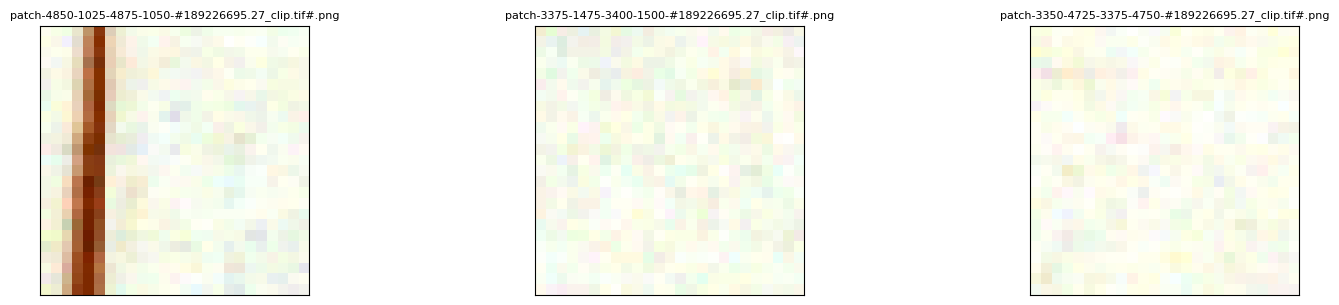

In [18]:
my_files.show_sample(num_samples=3, tree_level="patch")

In [9]:
# save patches in memory as geotiffs 
#my_files.save_patches_as_geotiffs()

  0%|          | 0/225 [00:00<?, ?it/s]

In [ ]:
# don't run on patches smaller than 100 px not much point
parent_list = my_files.list_parents()
my_files.show_parent(parent_list[0])

### Annotate

In [21]:
from mapreader.annotate.utils import prepare_annotation

annotation = prepare_annotation(
    userID="DavidA",
    annotation_tasks_file="annotation_tasks.yaml",
    task="walls",
    annotation_set="task_test_OS_maps_001",
    context_image=True,
    xoffset=200,
    yoffset=200
)

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/78400 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Number of images to annotate (current batch): 100


In [22]:
annotation

Annotation(canvas=OutputCanvas(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 6…

In [25]:
from mapreader.annotate.utils import save_annotation

save_annotation(
    annotation,
    userID="DavidA",
    task="walls",
    annotation_tasks_file="annotation_tasks.yaml",
    annotation_set="task_test_OS_maps_001",
)

[INFO] Save 99 new annotations to ../content/annotations_1950/walls_#DavidA#.csv
[INFO] 99 labels were not already stored
[INFO] Total number of saved annotations: 99


### Train

In [26]:
# Load and check annotations 
from mapreader import AnnotationsLoader

annotated_images = AnnotationsLoader()
annotated_images.load(annotations = "../content/annotations_1950/walls_#DavidA#.csv")

[INFO] Reading "../content/annotations_1950/walls_#DavidA#.csv"
[INFO] Number of annotations:   99

[INFO] Number of instances of each label (from column "label"):
        - 1:      69
        - 2:      30



In [27]:
# view the data
annotated_images.annotations

image_id  \
0   patch-6500-5575-6525-5600-#189226695.27_clip.t...   
1   patch-4175-2175-4200-2200-#189226695.27_clip.t...   
2   patch-3375-6275-3400-6300-#189226695.27_clip.t...   
3   patch-2550-5625-2575-5650-#189226695.27_clip.t...   
4   patch-75-3650-100-3675-#189226695.27_clip.tif#...   
..                                                ...   
94  patch-900-550-925-575-#189226695.27_clip.tif#.png   
95  patch-175-5225-200-5250-#189226695.27_clip.tif...   
96  patch-4975-2175-5000-2200-#189226695.27_clip.t...   
97  patch-2300-3325-2325-3350-#189226695.27_clip.t...   
98  patch-2700-6975-2725-6992-#189226695.27_clip.t...   

                                           image_path label  label_index  
0   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
1   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
2   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
3   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
4   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
..                                                ...   ...          ...  
94  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
95  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
96  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
97  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
98  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  

[99 rows x 4 columns]

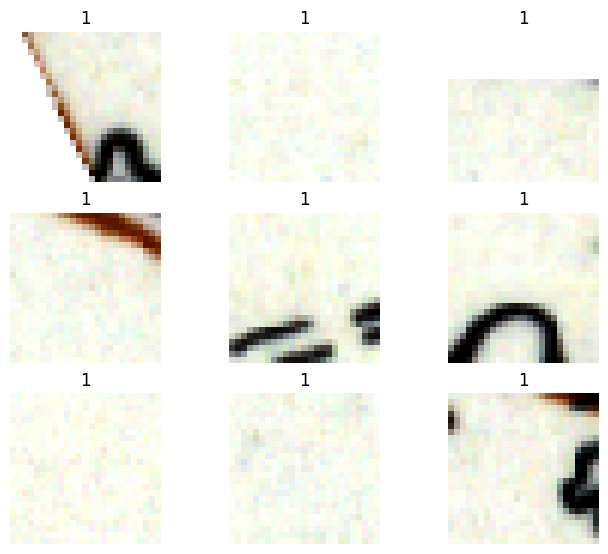

In [28]:
# look at no walls
annotated_images.show_sample(label_to_show="1")

[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 0-24 out of 99.


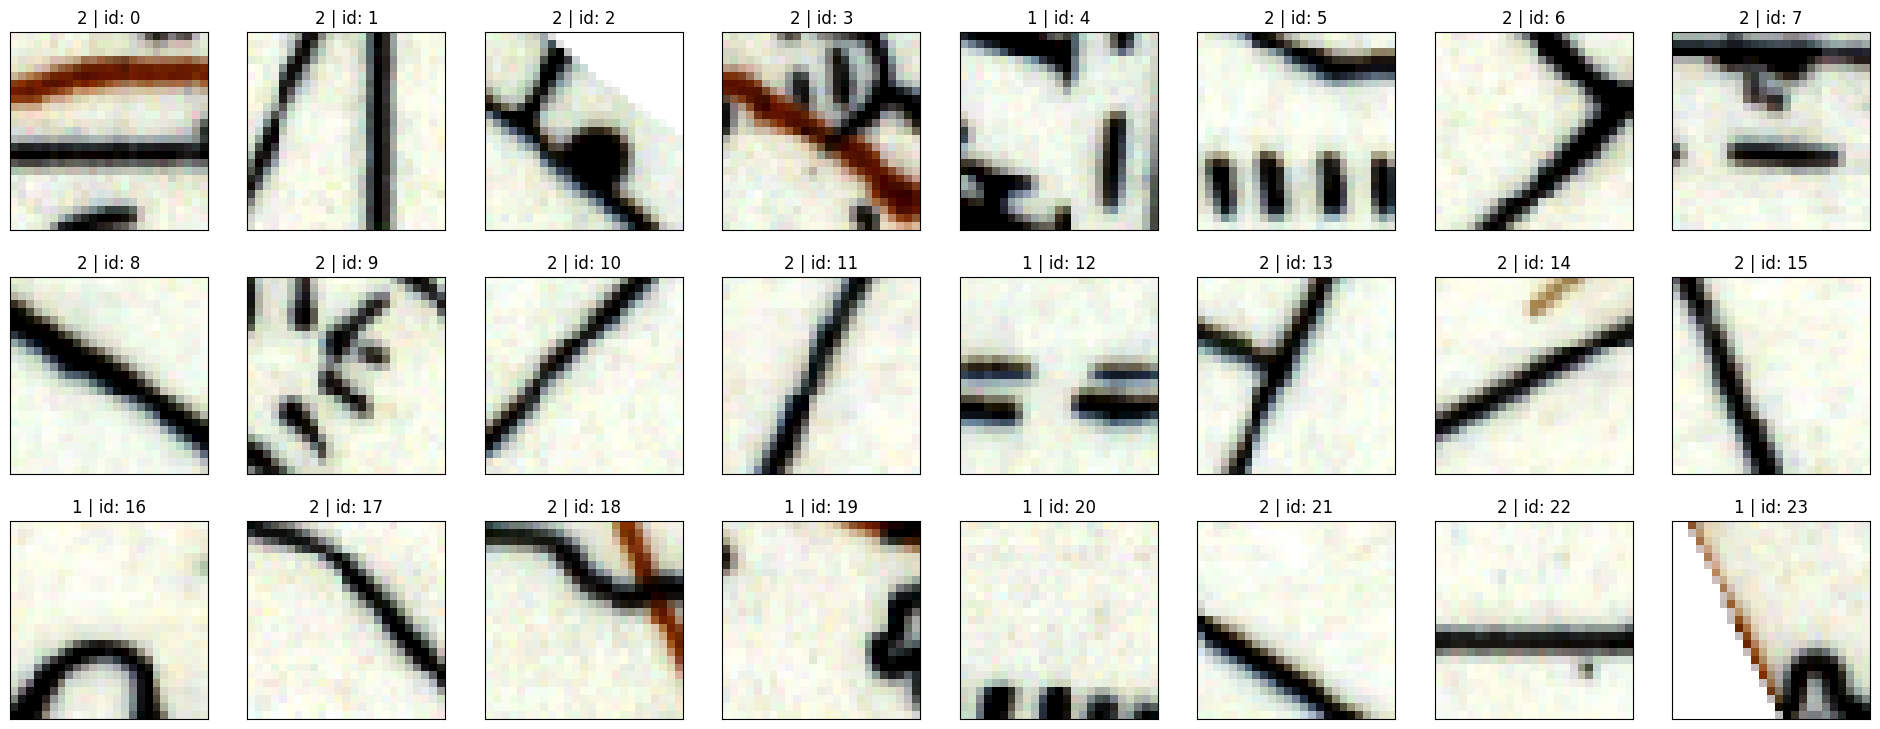

[INFO] IDs of current patches: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[INFO] Exited.


In [29]:
# walls
annotated_images.review_labels()

In [30]:
# Prepare datasets and dataloaders
annotated_images.create_datasets(frac_train=0.7, frac_val=0.2, frac_test=0.1)

[INFO] Number of annotations in each set:
        - Train:        69
        - Validate:     20
        - Test:         10


In [31]:
annotated_images.datasets["train"].patch_df.head()

image_id  \
76  patch-1850-3375-1875-3400-#189226695.27_clip.t...   
65  patch-5850-2000-5875-2025-#189226695.27_clip.t...   
54  patch-1650-4200-1675-4225-#189226695.27_clip.t...   
46  patch-1475-1350-1500-1375-#189226695.27_clip.t...   
17  patch-5100-25-5125-50-#189226695.27_clip.tif#.png   

                                           image_path label  label_index  
76  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
65  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
54  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
46  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
17  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0

In [32]:
annotated_images.labels_map

{0: '2', 1: '1'}

In [33]:
dataloaders = annotated_images.create_dataloaders(batch_size=8)

[INFO] Using default sampler.


### Load a pretrained PyTorch model, dataloaders and labels map

In [34]:
from mapreader import ClassifierContainer

In [35]:
my_classifier = ClassifierContainer(model ="resnet18",
                                    dataloaders=dataloaders,
                                    labels_map={0: 'no_wall', 1: 'wall'})

[INFO] Device is set to cpu
[INFO] Loaded "train" with 69 items.
[INFO] Loaded "val" with 20 items.
[INFO] Loaded "test" with 10 items.
[INFO] Initializing model.


In [36]:
my_classifier.labels_map

{0: 'no_wall', 1: 'wall'}

[INFO] dataset: train
        - items:        69
        - batch size:   8
        - batches:      9


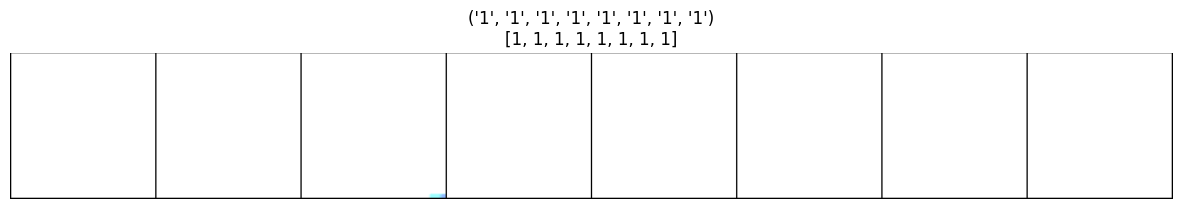

In [37]:
my_classifier.show_sample(set_name='train', batch_number=1)

In [38]:
my_classifier.model_summary()

Layer (type:depth-idx)                   Output Shape              Output Shape              Param #
ResNet                                   [8, 2]                    [8, 2]                    --
├─Conv2d: 1-1                            [8, 64, 112, 112]         [8, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [8, 64, 112, 112]         [8, 64, 112, 112]         128
├─ReLU: 1-3                              [8, 64, 112, 112]         [8, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [8, 64, 56, 56]           [8, 64, 56, 56]           --
├─Sequential: 1-5                        [8, 64, 56, 56]           [8, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [8, 64, 56, 56]           [8, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [8, 64, 56, 56]           [8, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [8, 64, 56, 56]           [8, 64, 56, 56]           128
│    │    └─ReLU: 3-3     

In [39]:
# Set up criterion, optimizer and scheduler
my_classifier.add_criterion("cross-entropy")

[INFO] Using "CrossEntropyLoss()" as criterion.


In [40]:
params_to_optimize = my_classifier.generate_layerwise_lrs(min_lr=1e-4, max_lr=1e-3, spacing='geomspace')

In [41]:
my_classifier.initialize_optimizer(params2optimize=params_to_optimize)

In [42]:
my_classifier.initialize_scheduler()

### Run the model

In [43]:
my_classifier.train(num_epochs=10,
                   save_model_dir="../model_output/models_test",
                   tensorboard_path="../model_output/tboard_tutorial",
                   tmp_file_save_freq=2,
                   remove_after_load=False,
                   print_info_batch_freq=10)

[INFO] Each training step will pass: ['train', 'val'].
2023-11-08 16:19:12 PC05258 [INFO] train    -- 1/10 --       8/69 ( 11.6% ) -- Loss: 0.282
2023-11-08 16:19:15 PC05258 [INFO] train    -- 1/10 -- Loss: 0.292; F_macro: 88.78; R_macro: 83.33
2023-11-08 16:19:15 PC05258 [INFO] val      -- 1/10 --       8/20 ( 40.0% ) -- Loss: 6.665
2023-11-08 16:19:15 PC05258 [INFO] val      -- 1/10 -- Loss: 7.016; F_macro: 49.49; R_macro: 64.29

2023-11-08 16:19:15 PC05258 [INFO] train    -- 2/10 --       8/69 ( 11.6% ) -- Loss: 0.002
2023-11-08 16:19:18 PC05258 [INFO] train    -- 2/10 -- Loss: 0.818; F_macro: 63.10; R_macro: 61.05
2023-11-08 16:19:18 PC05258 [INFO] val      -- 2/10 --       8/20 ( 40.0% ) -- Loss: 8.753
2023-11-08 16:19:18 PC05258 [INFO] val      -- 2/10 -- Loss: 11.877; F_macro: 41.18; R_macro: 50.00

[INFO] Checkpoint file saved to "./tmp_checkpoints/tmp_3628011902_checkpoint.pkl".
2023-11-08 16:19:19 PC05258 [INFO] train    -- 3/10 --       8/69 ( 11.6% ) -- Loss: 0.164
2023-11-

In [44]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

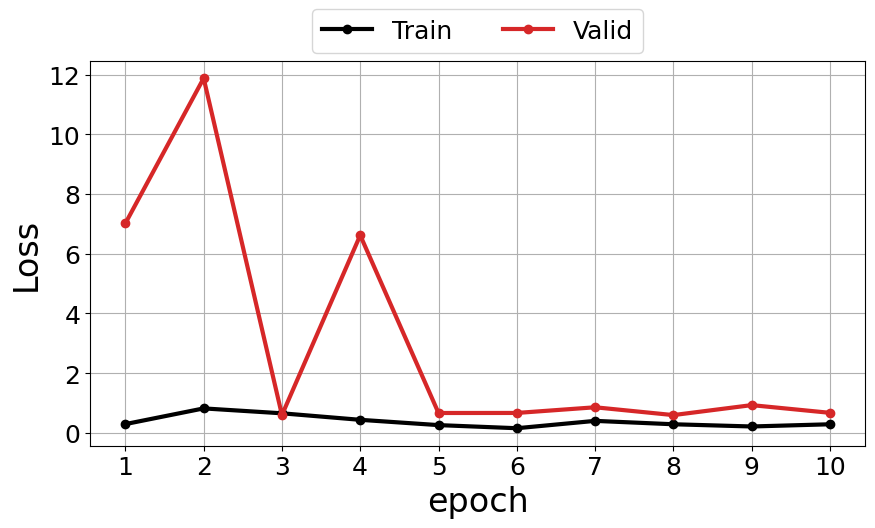

In [45]:
my_classifier.plot_metric(y_axis=["epoch_loss_train", "epoch_loss_val"],
                         y_label="Loss",
                         legends=["Train", "Valid"])

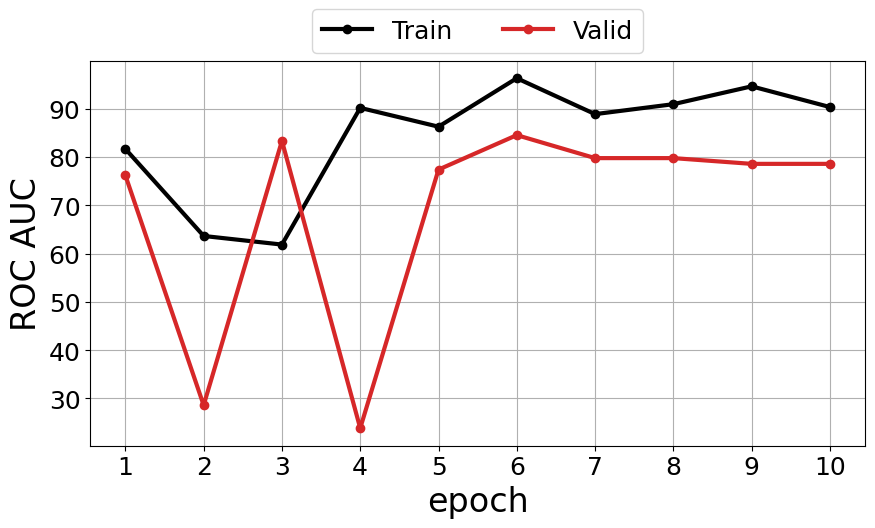

In [46]:
my_classifier.plot_metric(y_axis=["epoch_rocauc_macro_train", "epoch_rocauc_macro_val"],
                         y_label="ROC AUC",
                         legends=["Train", "Valid"],
                         colors=["k", "tab:red"])

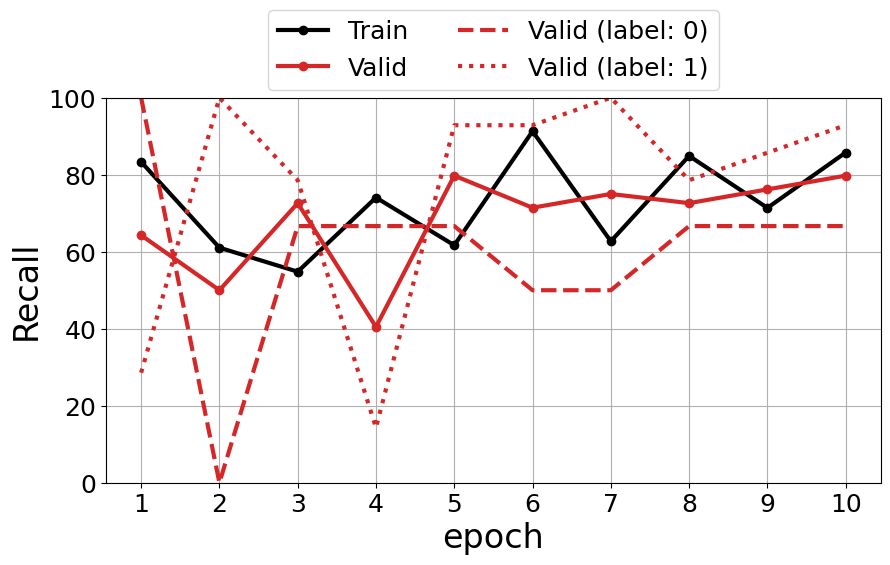

In [47]:
my_classifier.plot_metric(y_axis=["epoch_recall_macro_train",
                                 "epoch_recall_macro_val",
                                 "epoch_recall_0_val",
                                 "epoch_recall_1_val"],
                         y_label="Recall",
                         legends=["Train",
                                  "Valid",
                                  "Valid (label: 0)",
                                  "Valid (label: 1)",],
                         colors=["k", "tab:red", "tab:red", "tab:red"],
                         styles=["-", "-", "--", ":"],
                         markers=["o", "o", "", ""],
                         plt_yrange=[0, 100])

### Model Inference

In [48]:
from mapreader import load_patches

In [49]:
my_maps = load_patches("../content/tifs/patches/*png",
                      parent_paths="../content/tifs/*.tif")


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/78400 [00:00<?, ?it/s]

In [50]:
parent_df, patch_df = my_maps.convert_images()

In [51]:
# Create dataset from patches
from mapreader import PatchDataset
patch_dataset = PatchDataset(patch_df, transform="val")

In [52]:
my_classifier.load_dataset(patch_dataset,
                            set_name="patches",
                            batch_size=8,
                            shuffle=False)

In [53]:
my_classifier.print_batch_info(set_name='patches')

[INFO] dataset: patches
        - items:        78400
        - batch size:   8
        - batches:      9800


In [54]:
# Inference
my_classifier.inference(set_name="patches")

[INFO] Each training step will pass: ['patches'].
2023-11-08 16:21:30 PC05258 [INFO] patches  -- 11/11 --    8/78400 (  0.0% ) -- 
2023-11-08 16:21:31 PC05258 [INFO] patches  -- 11/11 --   48/78400 (  0.1% ) -- 
2023-11-08 16:21:31 PC05258 [INFO] patches  -- 11/11 --   88/78400 (  0.1% ) -- 
2023-11-08 16:21:32 PC05258 [INFO] patches  -- 11/11 --  128/78400 (  0.2% ) -- 
2023-11-08 16:21:33 PC05258 [INFO] patches  -- 11/11 --  168/78400 (  0.2% ) -- 
2023-11-08 16:21:33 PC05258 [INFO] patches  -- 11/11 --  208/78400 (  0.3% ) -- 
2023-11-08 16:21:34 PC05258 [INFO] patches  -- 11/11 --  248/78400 (  0.3% ) -- 
2023-11-08 16:21:34 PC05258 [INFO] patches  -- 11/11 --  288/78400 (  0.4% ) -- 
2023-11-08 16:21:35 PC05258 [INFO] patches  -- 11/11 --  328/78400 (  0.4% ) -- 
2023-11-08 16:21:37 PC05258 [INFO] patches  -- 11/11 --  368/78400 (  0.5% ) -- 
2023-11-08 16:21:38 PC05258 [INFO] patches  -- 11/11 --  408/78400 (  0.5% ) -- 
2023-11-08 16:21:39 PC05258 [INFO] patches  -- 11/11 --  44

In [55]:
# Add predictions to dataframe
predictions_df = patch_dataset.patch_df


In [56]:
import numpy as np
import pandas as pd

predictions_df['predicted_label'] = my_classifier.pred_label
predictions_df['pred'] = my_classifier.pred_label_indices
predictions_df['conf'] = np.array(my_classifier.pred_conf).max(axis=1)

predictions_df.head()

parent_id  \
image_id                                                                  
patch-0-0-25-25-#189226695.27_clip.tif#.png       189226695.27_clip.tif   
patch-0-100-25-125-#189226695.27_clip.tif#.png    189226695.27_clip.tif   
patch-0-1000-25-1025-#189226695.27_clip.tif#.png  189226695.27_clip.tif   
patch-0-1025-25-1050-#189226695.27_clip.tif#.png  189226695.27_clip.tif   
patch-0-1050-25-1075-#189226695.27_clip.tif#.png  189226695.27_clip.tif   

                                                                                         image_path  \
image_id                                                                                              
patch-0-0-25-25-#189226695.27_clip.tif#.png       c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-100-25-125-#189226695.27_clip.tif#.png    c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1000-25-1025-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1025-25-1050-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1050-25-1075-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-25-25-#189226695.27_clip.tif#.png            (0, 0, 25, 25)   
patch-0-100-25-125-#189226695.27_clip.tif#.png      (0, 100, 25, 125)   
patch-0-1000-25-1025-#189226695.27_clip.tif#.png  (0, 1000, 25, 1025)   
patch-0-1025-25-1050-#189226695.27_clip.tif#.png  (0, 1025, 25, 1050)   
patch-0-1050-25-1075-#189226695.27_clip.tif#.png  (0, 1050, 25, 1075)   

                                                 predicted_label  pred  \
image_id                                                                 
patch-0-0-25-25-#189226695.27_clip.tif#.png                 wall     1   
patch-0-100-25-125-#189226695.27_clip.tif#.png              wall     1   
patch-0-1000-25-1025-#189226695.27_clip.tif#.png         no_wall     0   
patch-0-1025-25-1050-#189226695.27_clip.tif#.png            wall     1   
patch-0-1050-25-1075-#189226695.27_clip.tif#.png            wall     1   

                                                      conf  
image_id                                                    
patch-0-0-25-25-#189226695.27_clip.tif#.png       0.999526  
patch-0-100-25-125-#189226695.27_clip.tif#.png    0.856297  
patch-0-1000-25-1025-#189226695.27_clip.tif#.png  0.947805  
patch-0-1025-25-1050-#189226695.27_clip.tif#.png  0.836973  
patch-0-1050-25-1075-#189226695.27_clip.tif#.png  0.842404

In [57]:
my_maps.add_metadata(patch_df, tree_level="patch")

In [58]:
my_maps.add_shape()

[INFO] Add shape, tree level: parent


In [59]:
parent_df, patch_df = my_maps.convert_images()
parent_df.head()

parent_id  \
image_id                          
189226695.27_clip.tif      None   

                                                              image_path  \
image_id                                                                   
189226695.27_clip.tif  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   

                                                                 patches  \
image_id                                                                   
189226695.27_clip.tif  [patch-0-0-25-25-#189226695.27_clip.tif#.png, ...   

                                 shape  
image_id                                
189226695.27_clip.tif  (6992, 6992, 3)

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 2 Axes>]

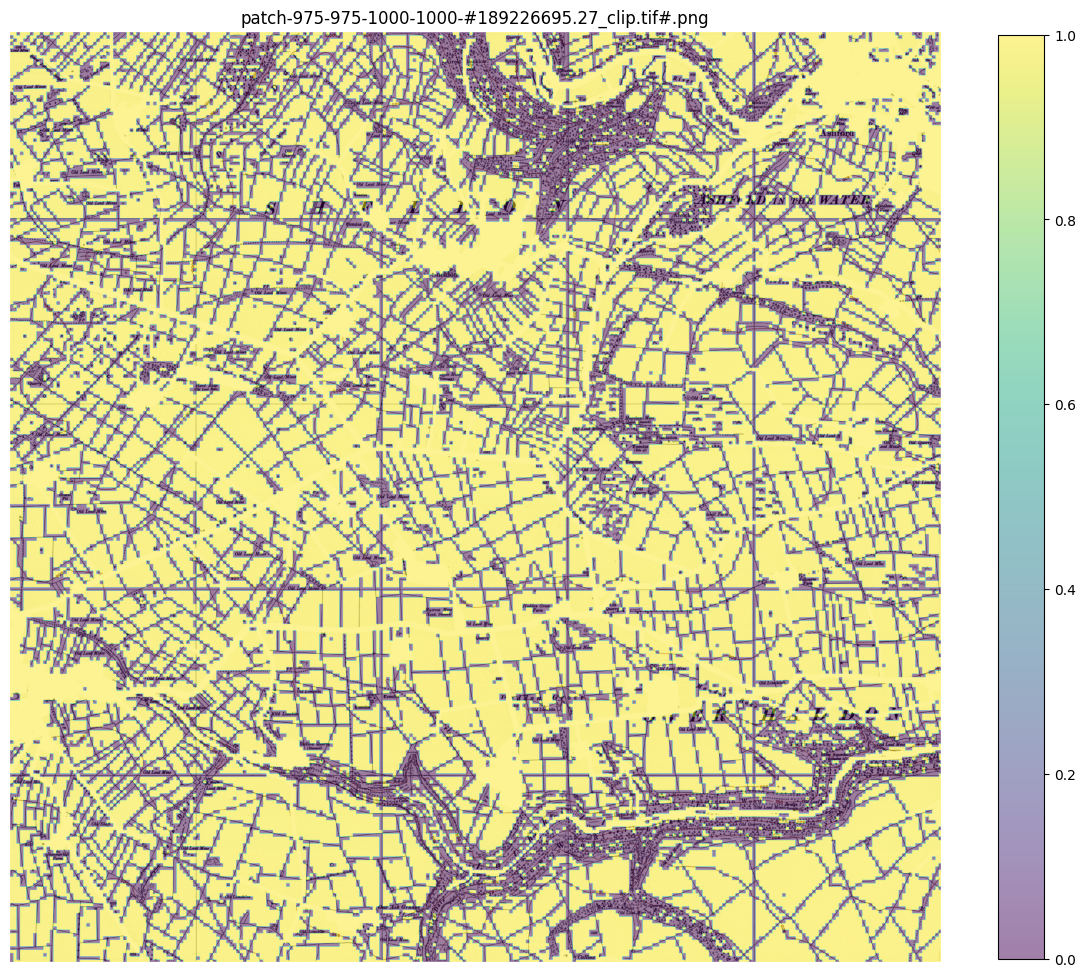

In [63]:
parent_list=my_maps.list_parents()

my_maps.show_parent(parent_list[0],
                column_to_plot="pred",
                patch_border=False,
                plot_parent=True,
                figsize=(15, 15),
                alpha=0.5)

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 2 Axes>]

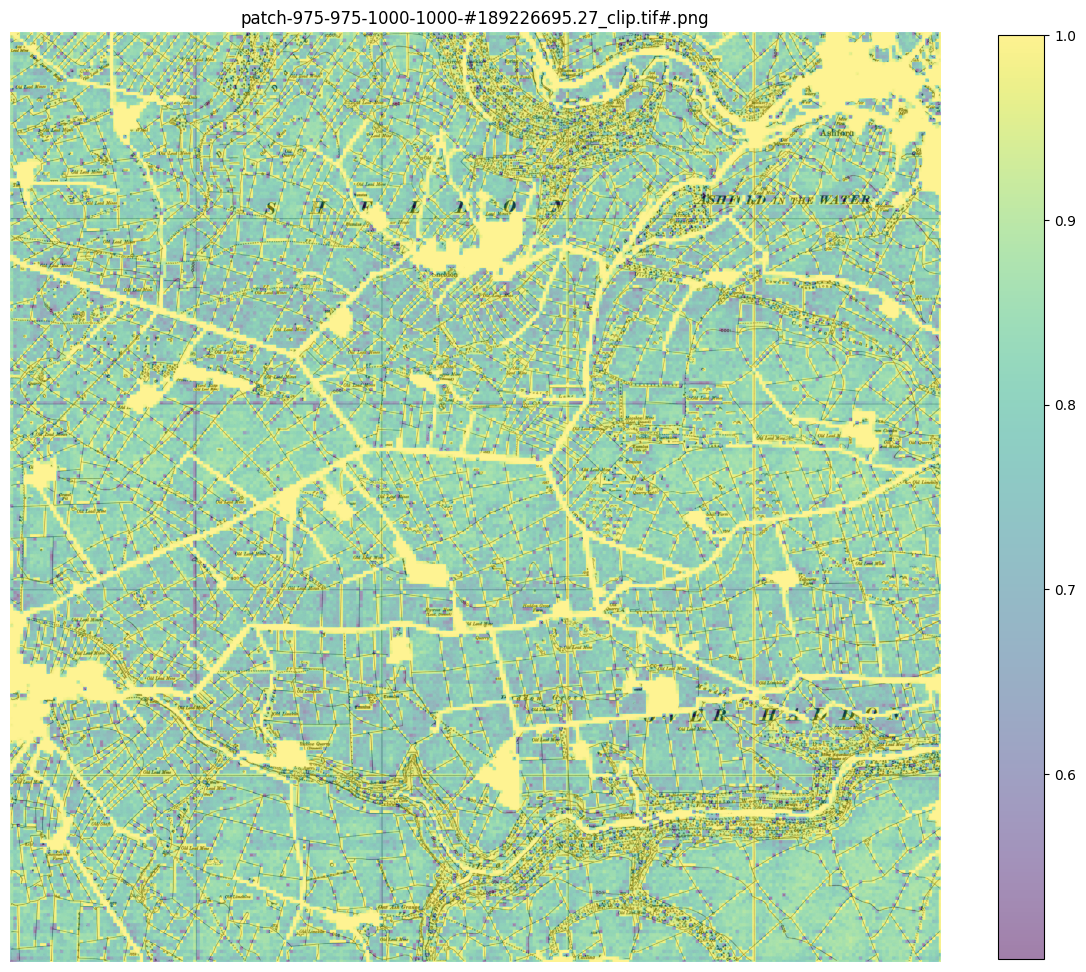

In [62]:
parent_list=my_maps.list_parents()

my_maps.show_parent(parent_list[0],
                column_to_plot="conf",
                patch_border=False,
                plot_parent=True,
                figsize=(15, 15),
                alpha=0.5)